<a href="https://colab.research.google.com/github/Priyandubey/Stock_Prediction_RNN/blob/master/Stock_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Stock prediction using long short term memory (LSTM) recurrent neural network


In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
df = web.DataReader('AAPL',data_source = 'yahoo',start = '2012-01-01',end = '2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


In [0]:
df.shape

(2003, 6)

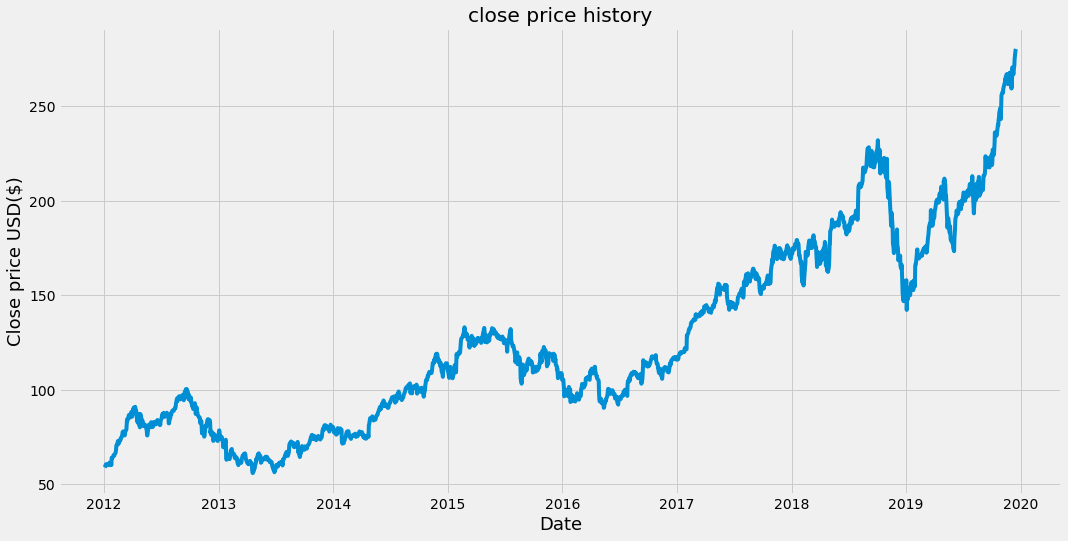

In [0]:
#Graph
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price USD($)',fontsize = 18)
plt.show()

In [0]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1603

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [0]:
train_data = scaled_data[0:training_data_len,:]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i - 60:i,0])
  y_train.append(train_data[i,0])

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [0]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1543/1543 [==============================] - 65s 42ms/step - loss: 7.4750e-04


In [0]:
test_data = scaled_data[training_data_len - 60:,:]

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

7.528625029844343

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


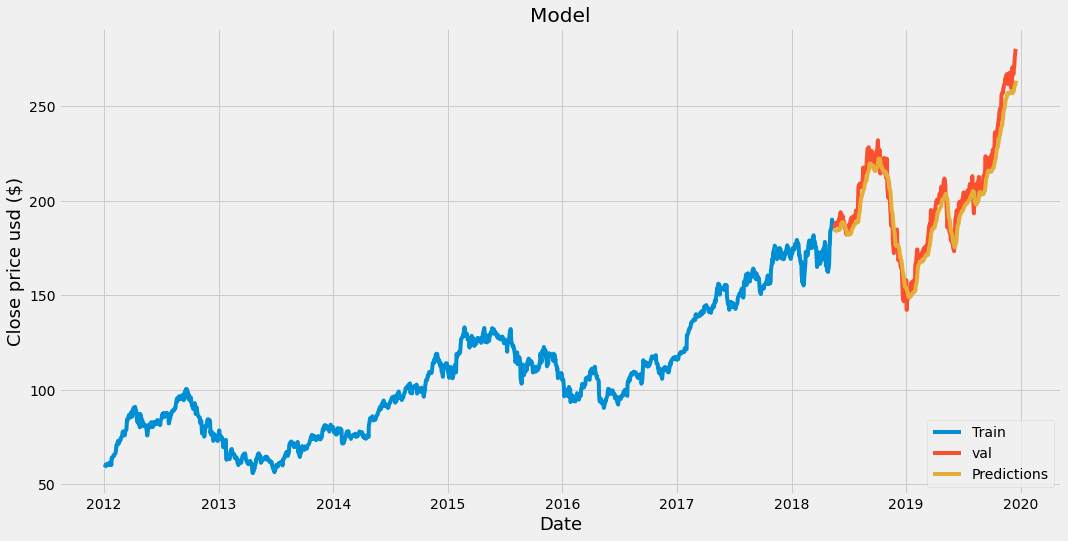

In [0]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price usd ($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc = 'lower right')
plt.show()

In [0]:
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,183.538300
2018-05-18,186.309998,183.844254
2018-05-21,187.630005,183.896118
2018-05-22,187.160004,183.969528
2018-05-23,188.360001,183.988861
...,...,...
2019-12-11,270.769989,258.849884
2019-12-12,271.459991,259.690796
2019-12-13,275.149994,260.593903


In [0]:
apple_quote = web.DataReader('AAPL',data_source='yahoo',start = '2012-01-01',end ='2020-05-15')

new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[296.13745]]


In [0]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start = '2020-05-15',end ='2020-05-15')
print(apple_quote2)

                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2020-05-15  307.899994  300.420013  ...  40697141  307.709991
2020-05-15  307.899994  300.209991  ...  41561200  307.709991

[2 rows x 6 columns]
